# Year 2023 Day 10


The main goal here is to show the different steps in the labyrinth resolution.


In [172]:
from advent_of_code.common.common import get_example_inputs_file_contents
from advent_of_code.y_2023.problem_202310 import AdventOfCodeProblem202310, PuzzleInput
from advent_of_code.y_2023.problem_202310 import get_pipe_to_pattern_mapping


problem = AdventOfCodeProblem202310(config_accumulate_outputs=True)
problem

AdventOfCodeProblem202310(year=2023, day=10, config_verbose=False, config_save_img=False, config_save_txt=False, config_save_img_for_video=False, config_accumulate_outputs=True)

## Visualization Code


In [216]:
from typing import Any
from advent_of_code.visualization.observable_plot import (
    build_base_xarray_plot,
)
from pyobsplot import Plot


from typing import Any, Callable

import numpy as np
import pandas as pd
import xarray as xr
from pyobsplot import Obsplot, Plot

from advent_of_code.y_2023.problem_202311 import get_compartiments

# See https://juba.github.io/pyobsplot/usage.html#renderers
# This is a singleton instance of observable plot, allowing further customization like
# changing the renderer from 'widget' to 'json'.
op = Obsplot(renderer="jsdom", theme="current")  # Literal['current','light','dark']
# op = Obsplot(renderer="jsdom", theme="dark")
# op = Obsplot(renderer="widget")


def build_base_xarray_plot(
    xda: xr.DataArray,
    callback: Callable[[list[Any]], None],
    *,
    dark_mode: bool = True,
    scale: float = 1,
    width: int = 140 * 4,
    **kwargs,
):
    # Callback is a consumer of list of marks that enrich it.
    # grid = (xda == ord("#")).astype(int) * 255
    grid = xda
    marks = []
    marks.append(
        Plot.axisX({"anchor": "top"}),  # type:ignore
    )

    marks.append(
        Plot.raster(  # type:ignore
            grid.values.reshape(-1).tolist(),
            {
                "width": grid.col.size,
                "height": grid.row.size,
                "imageRendering": "pixelated",
            },
        ),
    )

    callback(marks)

    if dark_mode:
        style = {
            "backgroundColor": "#111111",
            "color": "#eeeeee",
        }
    else:
        style = {}

    mr = kwargs.get("marginRight", 0)
    ml = kwargs.get("marginLeft", 0)
    return op(  # type:ignore
        {
            **{
                # weight seems to break aspectRatio
                # whereas width does not, hence it is kept.
                # "height": 140 * 4 * scale,
                "width": width * scale + mr + ml,
                "color": {"scheme": "magma"},
                "x": {"domain": [0, grid.col.size], "label": "column"},
                "y": {"domain": [grid.row.size, 0], "label": "row"},
                "marks": marks,
                "style": style,
                "aspectRatio": 1,
                "margin": 0,
            },
            **kwargs,
        }
    )


def visualize_puzzle_input_202310(
    xda: xr.DataArray,
    *,
    text_xda: xr.DataArray | None = None,
    **kwargs: Any,
):
    def callback(marks: list[Any]) -> None:
        if text_xda is not None:
            print("Text_xda")
            print( text_xda.values.reshape(-1).size)
            print( text_xda.values.reshape(-1).tolist())
            data = ["l"] * text_xda.values.reshape(-1).size
            print(data)
            grid_width = text_xda.values.shape[1]
            
            marks.append(
                Plot.text(  # type:ignore
                   data,
                    {
                        "text": Plot.identity,
                        "fill": "white",
                        "x": (lambda (d, i) : i % grid_width + 0.5),
                        "y": (lambda (d, i) : Math.floor(i / grid_width) + 0.5),
                        # "x": text_xda.values[0].tolist(),
                        # "y": text_xda.values[1].tolist(),
                    },
                ),
            )

    return build_base_xarray_plot(xda, callback, **kwargs)

SyntaxError: Lambda expression parameters cannot be parenthesized (3639019159.py, line 106)

## With Example Input


In [174]:
example_inputs_2023 = get_example_inputs_file_contents(2023)["test_problem_202310"]
list(example_inputs_2023.keys())

['EXAMPLE_INPUT_1_1',
 'EXAMPLE_INPUT_1_2',
 'EXAMPLE_INPUT_1_3',
 'EXAMPLE_INPUT_2_1',
 'EXAMPLE_INPUT_2_2',
 'EXAMPLE_DISTANCES_1',
 'EXAMPLE_DISTANCES_2',
 'EXAMPLE_INPUT_PART_2_1_1a',
 'EXAMPLE_INPUT_PART_2_1_1b',
 'EXAMPLE_INPUT_PART_2_1_2',
 'EXAMPLE_INPUT_PART_2_1_TEST',
 'EXAMPLE_INPUT_PART_2_2_1',
 'EXAMPLE_INPUT_PART_2_2_2',
 'EXAMPLE_INPUT_PART_2_3_1',
 'EXAMPLE_INPUT_PART_2_3_2']

In [191]:
import pandas as pd
import xarray as xr

from advent_of_code.y_2023.problem_202310 import render_2d_array_to_text

puzzle_input = problem.parse_text_input(
    example_inputs_2023["EXAMPLE_INPUT_PART_2_1_1a"]
)
# puzzle_input = problem.parse_text_input(example_inputs_2023["EXAMPLE_INPUT_2_1"])
maze = puzzle_input
minimum_distances = problem.compute_minimum_distances(maze)
result, outputs_accumulator = problem.compute_tiles_enclosed_by_loop_part_2(
    maze, minimum_distances
)
display(pd.Series(outputs_accumulator.keys()))

print("Text Input")
print(render_2d_array_to_text(outputs_accumulator["maze"]))

Current recursion limit:
15000
New recursion limit:
15000
Skipped top
Skipped left


0                 maze
1    minimum_distances
2            main_loop
3            raster_3x
4               filled
5        coarsened_img
dtype: object

Text Input
░░░░░░░░░░░░░
░░░░░░░░░░░░░
░░S───────┐░░
░░│┌─────┐│░░
░░││░░░░░││░░
░░││░░░░░││░░
░░│└─┐░┌─┘│░░
░░│░░│░│░░│░░
░░└──┘░└──┘░░
░░░░░░░░░░░░░
░░░░░░░░░░░░░


In [192]:
def visualize_puzzle_input(outputs_accumulator, **kwargs):
    min_dist_xda = xr.DataArray(
        outputs_accumulator["minimum_distances"], dims=["row", "col"]
    )
    visualize_puzzle_input_202310(
        min_dist_xda,
        color=dict(legend=True, scheme="magma"),
        title="Minimum Distances",
        **kwargs,
    )

    main_loop_xda = xr.DataArray(outputs_accumulator["main_loop"], dims=["row", "col"])
    visualize_puzzle_input_202310(
        main_loop_xda,
        color=dict(legend=True, scheme="Observable10"),
        title="Main Loop",
        **kwargs,
    )

    raster_3x_xda = xr.DataArray(outputs_accumulator["raster_3x"], dims=["row", "col"])
    visualize_puzzle_input_202310(
        raster_3x_xda,
        color=dict(legend=True, scheme="Observable10"),
        title="Raster 3x",
        **kwargs,
    )

    filled_xda = xr.DataArray(outputs_accumulator["filled"], dims=["row", "col"])
    visualize_puzzle_input_202310(
        filled_xda,
        color=dict(legend=True, scheme="Observable10"),
        title="Filled (flood fill)",
        **kwargs,
    )

    coarsened_img_xda = xr.DataArray(
        outputs_accumulator["coarsened_img"], dims=["row", "col"]
    )
    visualize_puzzle_input_202310(
        coarsened_img_xda,
        color=dict(legend=True, scheme="Observable10"),
        title="Coarsened 3x",
        **kwargs,
    )

TODO: Add text mark over the main loop (see example in https://observablehq.com/plot/marks/raster)


In [204]:
text_xda.values.reshape(-1).tolist()

['░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 'S',
 '─',
 '─',
 '─',
 '─',
 '─',
 '─',
 '─',
 '┐',
 '░',
 '░',
 '░',
 '░',
 '│',
 '┌',
 '─',
 '─',
 '─',
 '─',
 '─',
 '┐',
 '│',
 '░',
 '░',
 '░',
 '░',
 '│',
 '│',
 '░',
 '░',
 '░',
 '░',
 '░',
 '│',
 '│',
 '░',
 '░',
 '░',
 '░',
 '│',
 '│',
 '░',
 '░',
 '░',
 '░',
 '░',
 '│',
 '│',
 '░',
 '░',
 '░',
 '░',
 '│',
 '└',
 '─',
 '┐',
 '░',
 '┌',
 '─',
 '┘',
 '│',
 '░',
 '░',
 '░',
 '░',
 '│',
 '░',
 '░',
 '│',
 '░',
 '│',
 '░',
 '░',
 '│',
 '░',
 '░',
 '░',
 '░',
 '└',
 '─',
 '─',
 '┘',
 '░',
 '└',
 '─',
 '─',
 '┘',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░',
 '░']

In [218]:
main_loop_xda = xr.DataArray(outputs_accumulator["main_loop"], dims=["row", "col"])
text_xda=xr.DataArray(outputs_accumulator["maze"], dims=("row", "col"))

visualize_puzzle_input_202310(
    main_loop_xda,
    text_xda=text_xda,
    color=dict(legend=True, scheme="Observable10"),
    title="Main Loop",
    width=200,
)

Text_xda
143
['░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', 'S', '─', '─', '─', '─', '─', '─', '─', '┐', '░', '░', '░', '░', '│', '┌', '─', '─', '─', '─', '─', '┐', '│', '░', '░', '░', '░', '│', '│', '░', '░', '░', '░', '░', '│', '│', '░', '░', '░', '░', '│', '│', '░', '░', '░', '░', '░', '│', '│', '░', '░', '░', '░', '│', '└', '─', '┐', '░', '┌', '─', '┘', '│', '░', '░', '░', '░', '│', '░', '░', '│', '░', '│', '░', '░', '│', '░', '░', '░', '░', '└', '─', '─', '┘', '░', '└', '─', '─', '┘', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░', '░']
['l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 'l', 

TypeError: visualize_puzzle_input_202310.<locals>.callback.<locals>.<lambda>() missing 2 required positional arguments: 'd' and 'i'

The trick is to replace in pipe symbol of the Main loop by a 3x3 macro-pixel materializing this symbol:


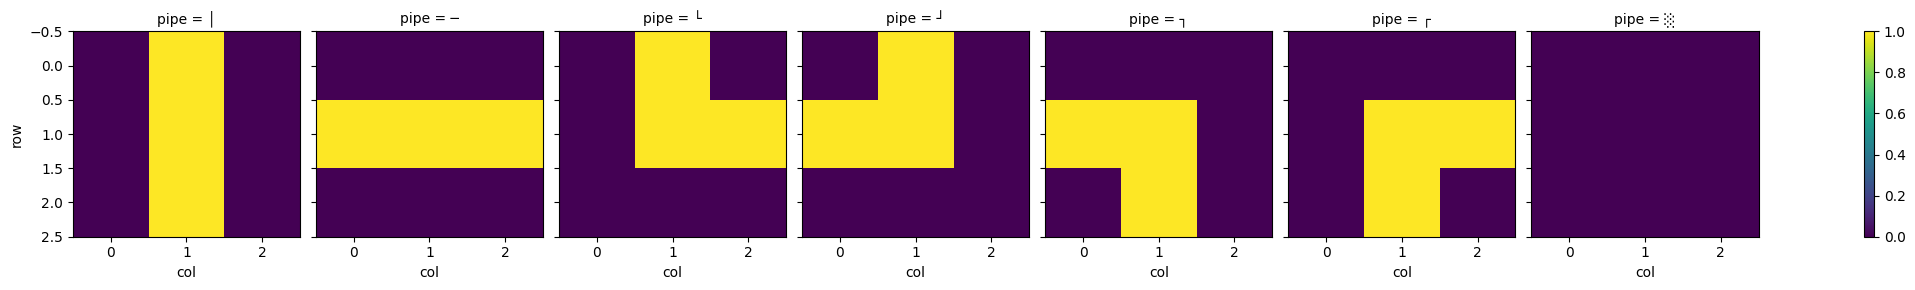

In [178]:
mapping = get_pipe_to_pattern_mapping()
mapping_xda = xr.Dataset(
    {k: xr.DataArray(v, dims=("row", "col")) for k, v in mapping.items()}
).to_array(dim="pipe")
mapping_xda.plot(y="row", x="col", col="pipe", yincrease=False)


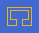

In [179]:
raster_3x_xda = xr.DataArray(outputs_accumulator["raster_3x"], dims=["row", "col"])
visualize_puzzle_input_202310(
    raster_3x_xda,
    color=dict(legend=True, scheme="Observable10"),
    title="(After) Raster 3x",
    width=200,
)

Then, this new raster truly materializes the pipe network.


To find the inside area is now easy: use a [Flood Fill](https://en.wikipedia.org/wiki/Flood_fill) algorithm, for instance implemented by scipy: [skimage.morphology.flood_fill](https://scikit-image.org/docs/stable/api/skimage.morphology.html#skimage.morphology.flood_fill).



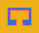

In [180]:
filled_xda = xr.DataArray(outputs_accumulator["filled"], dims=["row", "col"])
visualize_puzzle_input_202310(
    filled_xda,
    color=dict(legend=True, scheme="Observable10"),
    title="Filled (flood fill)",
    width=200,
)

The final trick is to go back to the original raster, knowing which pixels are filled.
A pixel is considered as filled if its corresponding 3x3 macro-pixel is entirely filled. This excludes the macro-pixels representing pipe from the count.


In [181]:
coarsened_img_xda = xr.DataArray(
    outputs_accumulator["coarsened_img"], dims=["row", "col"]
)
visualize_puzzle_input_202310(
    coarsened_img_xda,
    color=dict(legend=True, scheme="Observable10"),
    title="Coarsened 3x",
    width=200,
)

In [182]:
maze = problem.parse_text_input(example_inputs_2023["EXAMPLE_INPUT_2_1"])
result, outputs_accumulator = problem.compute_tiles_enclosed_by_loop_part_2(
    maze, problem.compute_minimum_distances(maze)
)

print("Text Input")
print(render_2d_array_to_text(outputs_accumulator["maze"]))

visualize_puzzle_input(outputs_accumulator, width=200)

Current recursion limit:
15000
New recursion limit:
15000
Skipped top
Skipped left
Text Input
░░░░░░░
░░░┌┐░░
░░┌┘│░░
░S┘░└┐░
░│┌──┘░
░└┘░░░░
░░░░░░░


Current recursion limit:
15000
New recursion limit:
15000
Skipped top
Skipped left
Text Input
░░░░░░░░░░░░░
░░░░░░░░░░░░░
░░S───────┐░░
░░│┌─────┐│░░
░░││░░░░░││░░
░░││░░░░░││░░
░░│└─┐░┌─┘│░░
░░│░░│░│░░│░░
░░└──┘░└──┘░░
░░░░░░░░░░░░░
░░░░░░░░░░░░░



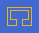


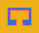

In [183]:
maze = problem.parse_text_input(example_inputs_2023["EXAMPLE_INPUT_PART_2_1_1a"])
result, outputs_accumulator = problem.compute_tiles_enclosed_by_loop_part_2(
    maze, problem.compute_minimum_distances(maze)
)

print("Text Input")
print(render_2d_array_to_text(outputs_accumulator["maze"]))

visualize_puzzle_input(outputs_accumulator, width=200)

## With Actual Input


Current recursion limit:
15000
New recursion limit:
15000
Skipped left
Skipped right



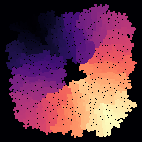


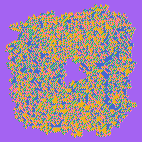


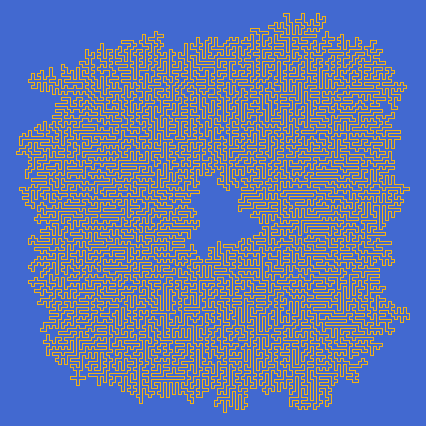


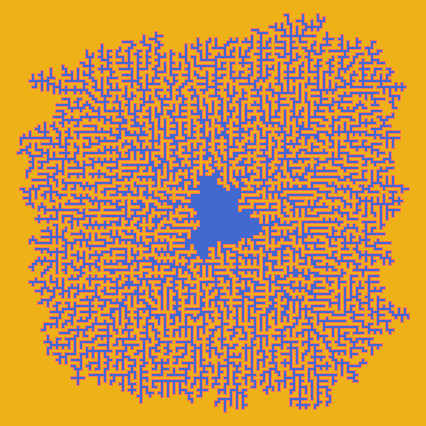


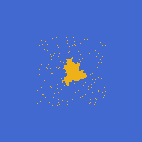

In [184]:
def visualize_actual_input(problem: AdventOfCodeProblem202310):
    maze = problem.parse_input_text_file()

    minimum_distances = problem.compute_minimum_distances(maze)
    result, outputs_accumulator = problem.compute_tiles_enclosed_by_loop_part_2(
        maze, minimum_distances
    )

    visualize_puzzle_input(
        outputs_accumulator, width=maze.shape[0] * 3, height=maze.shape[0] * 3, margin=0
    )


visualize_actual_input(problem)